In [1]:
import requests

server = 'api.outbreak.info' # or 'dev.outbreak.info'
auth = 'Bearer 0ed52bbfb6c79d1fd8e9c6f267f9b6311c885a4c4c6f037d6ab7b3a40d586ad0' # keep this private!
nopage = 'fetch_all=true&page=0' # worth verifying that this works with newer ES versions as well

def get_outbreak_data(endpoint, argstring, server=server, auth=auth):
    auth = {'Authorization': str(auth)}
    return requests.get(f'https://{server}/{endpoint}?q={argstring}', headers=auth)

In [2]:
location = 'GBR'
data = get_outbreak_data('covid19/query', f"location_id:{location}&sort=date&fields=date,confirmed_numIncrease&{nopage}")

In [4]:
import pandas as pd 
raw=data.json()["hits"]

In [27]:
import sys
sys.path.append('..')
from outbreak_data import *

In [36]:
tableGBR=outbreak_data.cases_by_location('GBR')
tableGBR.drop(columns=['_score', 'admin1'], axis=1

,_id,confirmed_numIncrease,date
0,GBR_None_None2020-04-14,4325,2020-04-14
1,GBR_None_None2020-04-27,4702,2020-04-27
2,GBR_None_None2020-05-06,3831,2020-05-06
3,GBR_None_None2020-05-07,3767,2020-05-07
4,GBR_None_None2020-05-08,3049,2020-05-08
...,...,...,...
857,GBR_None_None2022-05-13,6587,2022-05-13
858,GBR_None_None2022-05-14,0,2022-05-14
859,GBR_None_None2022-05-15,0,2022-05-15
860,GBR_None_None2022-06-06,33053,2022-06-06


<AxesSubplot:title={'center':'Number of Cases Over Time'}, xlabel='Date', ylabel='Number of Cases'>

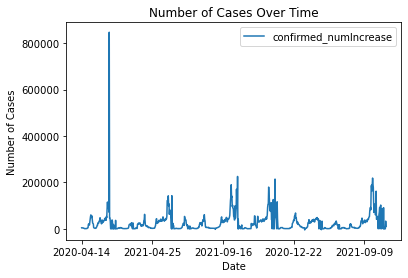

In [35]:
tableGBR.sort_values(by="date")
tableGBR.plot.line(x='date', y='confirmed_numIncrease', title='Number of Cases Over Time', xlabel='Date', ylabel='Number of Cases')


<AxesSubplot:title={'center':'Number of Cases Over Time'}, xlabel='Date', ylabel='Number of Cases'>

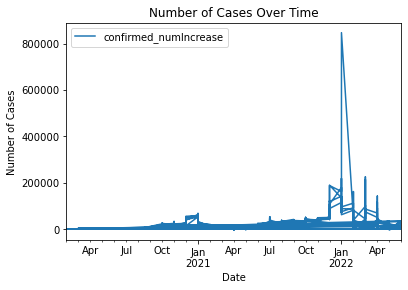

In [45]:
tableGBR['month_year'] = pd.to_datetime(tableGBR['date']).dt.to_period('M')
tableGBR.plot.line(x='month_year', y='confirmed_numIncrease', title='Number of Cases Over Time', xlabel='Date', ylabel='Number of Cases')
